In [8]:
import math

import random

import matplotlib.pyplot as plt

import numpy as np

import pylab

import csv

%matplotlib inline

In [9]:
i = 1
Garray = [0]
N = 100     #Number of trials

a1 = 1.6  #length of detector 1
a2 = 1.6  #length of detector 2
b1 = 1.6  #width of detector 1
b2 = 1.6  #width of detector 2
l = 2.3   #space in between the detectors

for i in range(1,N):
    #N = 10000 #Sample Size

    z = 0       #array variable

    phi = []  #Values of phi

    cos = []  #Values of Cos(theta)

    theta = []    #Values of theta

    I = []

    for z in range(0, i):
        k = random.uniform(0,6.2831853071796)
        phi.append(k)
        I.append(z)
        z = z + 1
    #print(I)


    for z in range(0, i):
        k = random.uniform(0,1)
        cos.append(k)
        theta.append(math.acos(k))
        z = z + 1
    
    #print(phi)
    #print(theta)

    #plt.hist(phi)
    

    z = 0     #loop variable 
    A = []    #Directional Response Variable
    for z in range(0,i):
    
    #The following for loop calculates Directional Response for all values of phi and and theta created above. All of which is 
    #dictated by the fact that the fact that both detectors are taken to be square and identical. An array, A, is made based on 
    #full of all the possible values
    
    
        alpha = (1/2) * (a1 + a2)
        beta = (1/2) * (b1 + b2)
        gamma = (1/2) * (a1 - a2)
        delta = (1/2) * (b1 - b2)
        zeta = (-l*(math.tan(theta[z]))*(math.cos(phi[z])))
        nu = (-l*(math.tan(theta[z]))*(math.sin(phi[z])))
        j = gamma + zeta
        k = gamma - zeta
        m = delta + nu
        n = delta - nu
        if j > 0:
            Hj = 1
        else:
            Hj = 0
        if k > 0:
            Hk = 1
        else:
            Hk = 0
    
        if m > 0:
            Hm = 1
        else:
            Hm = 0
        if n > 0:
            Hn = 1
        else:
            Hn = 0
    
        X = a2-j*Hj-k*Hk
        Y = b2-m*Hm-n*Hn


        if X > 0:
            HX = 1
        else:
            HX = 0
        if Y > 0:
            HY = 1
        else:
            HY = 0

        U = X*HX*Y*HY
        A.append(U)
        z = z + 1

    z = 0

    Apos = []
    #print(Apos)
    for z in range(0,len(A)):
    
    #This for loop takes all non zero values of A and creates a new array, Apos, of only those directional response numbers    
    
        if A[z] > 0:
            Apos.append(A[z])
            z = z + 1
            
    A1 = a1 * b1
    A2 = a2 * b2

    MaxG = A1*A2/pow(l,2)
    MinG = MaxG*(1-((pow(a1,2)+pow(a2,2)+pow(b1,2)+pow(b2,2))/(6*pow(l,2))))

    #print('Because our two detectors are both square and identical we can approximate G to be within the range:')
    #print(MaxG,'>= G >=',MinG)           
    
    
    
    dw = (abs(0-6.2831853)*abs(0-1))/i
    z = 0
    G = 0
    
    for z in range(0,i):
        G = G + (A[z]*dw)
        z = z + 1
    Garray.append(G)
    i = i + 10
#print(Garray)

1.2388657844990556


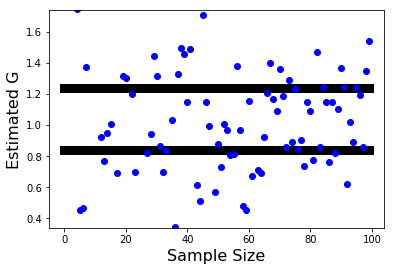

In [10]:
x = np.arange(0,N)
y_max = MaxG + 0*x
y_min = MinG + 0*x
plt.plot(x, y_max, 'k', lw = 9)
plt.plot(x, y_min, 'k', lw = 9)
plt.plot(x, Garray, 'ob')
pylab.ylim(MinG - 0.5, MaxG + 0.5)
plt.xlabel('Sample Size', fontsize = 16)
plt.ylabel('Estimated G', fontsize = 16)
print(MaxG)


In [11]:
with open('Energy.csv',newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    x = []
    y = []
    ty = []
    iy = []
    for row in reader:
        #print(row['Energy'],row['dN/dE*10^-4'],row['dN/dE'],row['E*dN/dE'])
        x.append(row['Energy'])
        y.append(row['dN/dE*10^-4'])
        ty.append(row['dN/dE'])
        iy.append(row['E*dN/dE'])
    print(ty)
    

['2.555097090352502', '1.6967959918688966', '1.480370323566661', '1.2915496650148772', '0.9830884473994768', '0.6528521141127821', '0.4335478501746005', '0.33000347911252753', '0.19119717955004945', '0.11077568505097042', '0.055994858066092786', '0.02830426305555396', '0.008289312615337137', '0.005504789807854945', '0.0018478497974222868', '0.001070605893154232', '0.0005411695265464627', '0.00018165997883753214', '0.00018165997883753214', '0.0001206372646810021', '5.3201750963247405e-05', '5.3201750963247405e-05', '3.082399239745118e-05', '1.78587826550012e-05', '9.027251779484541e-06', '9.027251779484541e-06', '4.5630923599031475e-06', '1.5317404637020734e-06', '1.5317404637020734e-06', '3.414548873833587e-07', '3.9137456019803764e-07', '1.3137675134229726e-07', '6.640827850634797e-08', '3.3568035509466926e-08', '3.3568035509466926e-08', '1.6967959918688897e-08', '2.8791166380223292e-09', '4.9693123588647325e-09', '1.269707554918806e-09']


In [12]:
x = np.array(x,dtype=float)
y = np.array(y,dtype=float)
ty = np.array(ty,dtype=float)
iy = np.array(iy,dtype=float)

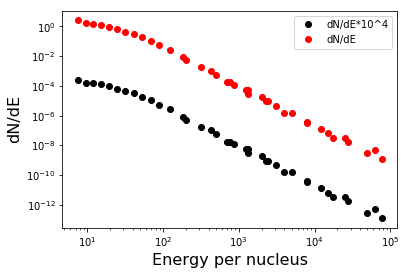

In [13]:
plt.loglog(x, y, 'ok', label='dN/dE*10^4')
plt.xlabel('Energy per nucleus',fontsize=16)
plt.ylabel('dN/dE', fontsize=16)
#plt.title('Carbon * 10^-4')

plt.loglog(x,ty,'or', label='dN/dE')

dlogE = abs(5-1)/len(x)

#plt.loglog(x,iy,'ob', label= 'E*dN/dE')

plt.legend(loc = 'upper right')

plt.show()


#print(ty)
#print(len(ty))
#print(len(x))


Text(0,0.5,'E*dN/dE')

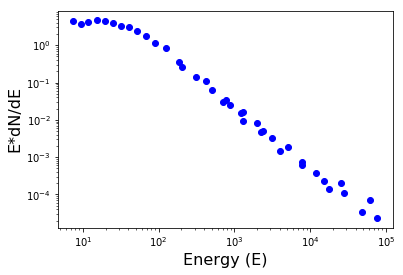

In [14]:
plt.loglog(x,iy,'ob',label = 'E*dN/dE')

plt.xlabel('Energy (E)', fontsize = 16)
plt.ylabel('E*dN/dE', fontsize = 16)